# Data Dive 3
## The Billionaire's Club

### Katherine Simon, James Evans, Ashton Morgan, Nicholas Sartino 

In [153]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import plotly.express as px


In [36]:
# Read data

df = pd.read_csv('forbes_2640_billionaires.csv', index_col = 0, header = 0)

In [37]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 1 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2640 non-null   object 
 1   forbes_id           2640 non-null   object 
 2   net_worth           2640 non-null   float64
 3   age                 2575 non-null   float64
 4   age_range           2640 non-null   int64  
 5   country             2640 non-null   object 
 6   source              2640 non-null   object 
 7   industry            2640 non-null   object 
 8   Age                 2555 non-null   float64
 9   Source of Wealth    2639 non-null   object 
 10  Self-Made Score     558 non-null    float64
 11  Philanthropy Score  411 non-null    float64
 12  Residence           2581 non-null   object 
 13  Citizenship         2629 non-null   object 
 14  Marital Status      2089 non-null   object 
 15  Children            1598 non-null   float64
 16  Education  

In [5]:
# Preview data

df.head()

,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
rank,,,,,,,,,,,,,,,,,,,,,
1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


## How many children do the wealthy have?

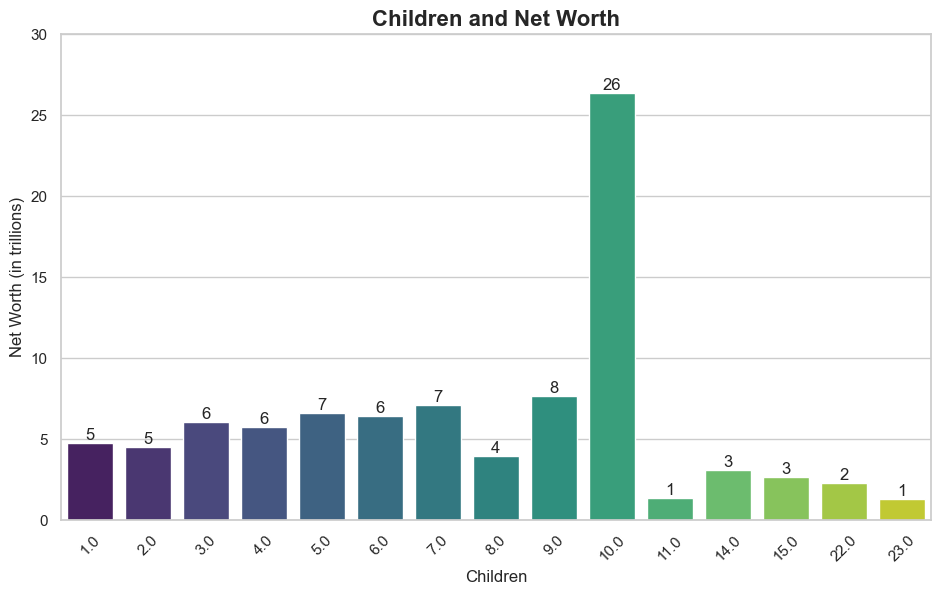

In [6]:
# Children and Net Worth

# set style
sns.set(style = "whitegrid")

# set figure size
plt.figure(figsize=(10,6))

# create bar plot
ax = sns.barplot(x= 'Children', y = 'net_worth', data = df, palette = "viridis", errorbar= None)
plt.title('Children and Net Worth', fontsize = 16, fontweight = 'bold')
plt.xlabel('Children')
plt.ylabel('Net Worth (in trillions)')

# rotate x axis labels so it is easier to read
plt.xticks(rotation = 45)

# adjust y axis scale
plt.ylim(0, 30)

# add count numbers on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom')
# display results
plt.show()

## How many billions do most billionaires have?

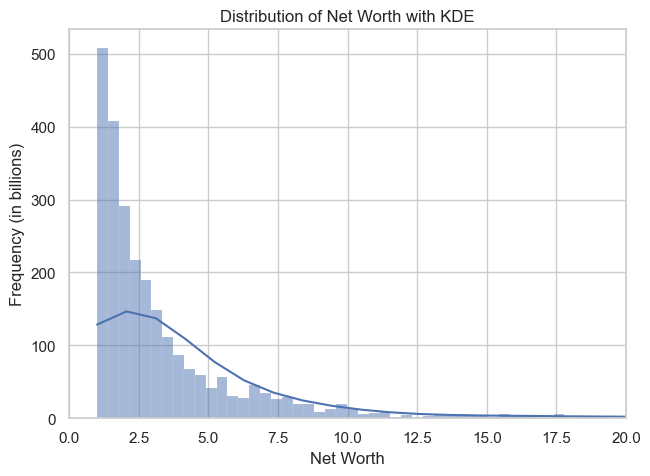

In [7]:
# Distribution of Billionaires

num_bins = 20
# Define range for x-axis
x_range = (0,20)

# Create the histogram 
# KDE refers to the kernel density estimate and is the line that is the overlay on the histogram
sns.histplot(df['net_worth'], kde=True)
plt.xlabel('Net Worth')
plt.ylabel('Frequency (in billions)')
plt.title('Distribution of Net Worth with KDE')

plt.xlim(x_range)
plt.show()

# NET WORTH IS IN BILLIONS

#### Clearly, the vast majority of billionaires have less than 5 billion dollars.

# Which industries produce the most billionaires?

In [133]:
# Group by industry and country and count the billionaires in each combination
industry_country_counts = df.groupby(['industry']).size().reset_index(name='Billionaire Count')

# Find the country with the most billionaires in each industry
max_billionaires_per_industry = industry_country_counts.groupby('industry').max()


# Display the result
print(max_billionaires_per_industry)

                            Billionaire Count
industry                                     
Automotive                                 73
Construction & Engineering                 45
Diversified                               187
Energy                                    100
Fashion & Retail                          266
Finance & Investments                     372
Food & Beverage                           212
Gambling & Casinos                         25
Healthcare                                201
Logistics                                  40
Manufacturing                             324
Media & Entertainment                      91
Metals & Mining                            74
Real Estate                               193
Service                                    53
Sports                                     39
Technology                                314
Telecom                                    31


In [8]:
# Group by industry and country and count the billionaires in each combination
#industry_country_counts = df.groupby(['industry', 'Citizenship']).size().reset_index(name='Billionaire Count')

# Find the country with the most billionaires in each industry
#max_billionaires_per_industry = industry_country_counts.groupby('industry').max()


# Display the result
#print(max_billionaires_per_industry)


                              Citizenship  Billionaire Count
industry                                                    
Automotive                        Vietnam                 18
Construction & Engineering  United States                  5
Diversified                       Vietnam                 21
Energy                      United States                 34
Fashion & Retail            United States                 57
Finance & Investments             Vietnam                183
Food & Beverage                   Vietnam                 71
Gambling & Casinos          United States                  6
Healthcare                  United States                 65
Logistics                   United States                  8
Manufacturing                     Vietnam                138
Media & Entertainment       United States                 38
Metals & Mining             United States                 18
Real Estate                 United States                 49
Service                 

# What does the martial status of the wealthy look like?

In [9]:
# Count how many billionaires in each category of relationship status
relationship_counts = df['Marital Status'].value_counts()

#display result
print(relationship_counts)

Marital Status
Married               1711
Divorced               140
Widowed                121
Single                  76
In Relationship         18
Widowed, Remarried      11
Separated               10
Engaged                  2
Name: count, dtype: int64


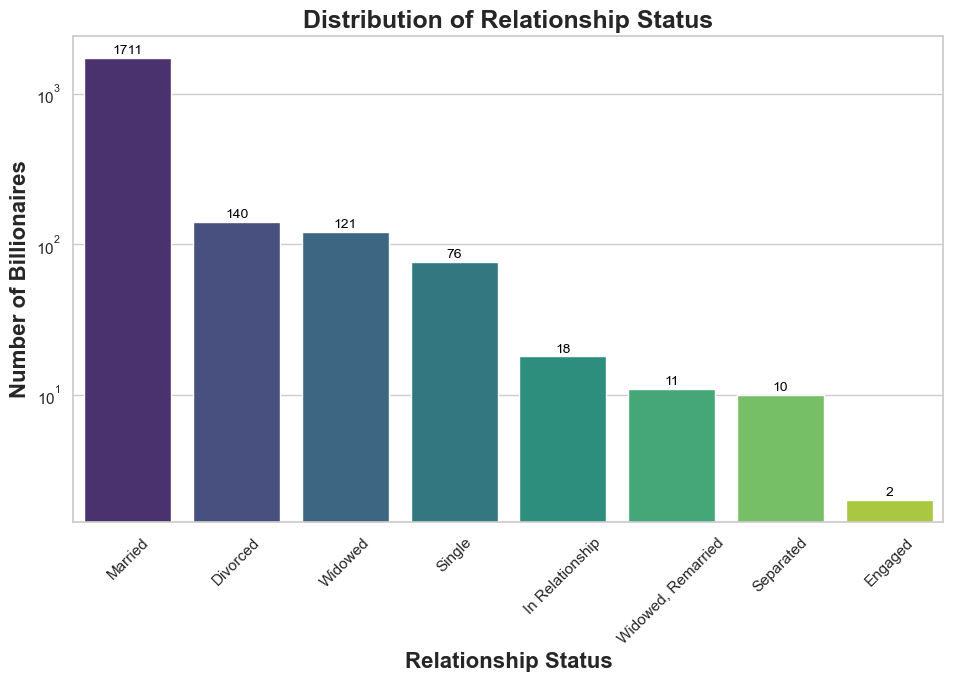

In [10]:
# group data in Marital Status column and count
relationship_counts = df['Marital Status'].value_counts()

# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = relationship_counts.index, y = relationship_counts.values, palette = "viridis")
ax.set_yscale("log")
plt.title('Distribution of Relationship Status', fontsize = 18, fontweight = 'bold')
plt.xlabel('Relationship Status', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 45)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()

# Sorted list of billionaires and Formatted Report

In [11]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

print(top_10_billionaires)

                           name          forbes_id  net_worth   age  \
rank                                                                  
1      Bernard Arnault & family    bernard-arnault      211.0  74.0   
2                     Elon Musk          elon-musk      180.0  51.0   
3                    Jeff Bezos         jeff-bezos      114.0  59.0   
4                 Larry Ellison      larry-ellison      107.0  78.0   
5                Warren Buffett     warren-buffett      106.0  92.0   
6                    Bill Gates         bill-gates      104.0  67.0   
7             Michael Bloomberg  michael-bloomberg       94.5  81.0   
8     Carlos Slim Helu & family   carlos-slim-helu       93.0  83.0   
9                 Mukesh Ambani      mukesh-ambani       83.4  65.0   
10                Steve Ballmer      steve-ballmer       80.7  67.0   

      age_range        country              source               industry  \
rank                                                                  

In [12]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

for index, row in top_10_billionaires.iterrows():
    print(f"Name: {row['name']}")
    print(f"Net Worth: {row['net_worth']} billion")
    print(f"Age: {row['age']}")
    print(f"Country: {row['country']}")
    print(f"Source of Wealth: {row['source']}")
    print(f"Industry: {row['industry']}")
    print(f"Marital Status: {row['Marital Status']}")
    print(f"Number of Children: {row['Children']}")
    print(f"Education: {row['Education']}")
    print('-' * 50)    

Name: Bernard Arnault & family
Net Worth: 211.0 billion
Age: 74.0
Country: France
Source of Wealth: LVMH
Industry: Fashion & Retail
Marital Status: Married
Number of Children: 5.0
Education: Bachelor of Arts/Science, Ecole Polytechnique de Paris
--------------------------------------------------
Name: Elon Musk
Net Worth: 180.0 billion
Age: 51.0
Country: United States
Source of Wealth: Tesla, SpaceX
Industry: Automotive
Marital Status: Single
Number of Children: 10.0
Education: Bachelor of Arts/Science, University of Pennsylvania
--------------------------------------------------
Name: Jeff Bezos
Net Worth: 114.0 billion
Age: 59.0
Country: United States
Source of Wealth: Amazon
Industry: Technology
Marital Status: Engaged
Number of Children: 4.0
Education: Bachelor of Arts/Science, Princeton University
--------------------------------------------------
Name: Larry Ellison
Net Worth: 107.0 billion
Age: 78.0
Country: United States
Source of Wealth: Oracle
Industry: Technology
Marital Sta

# Is the "college-dropout" trope true?

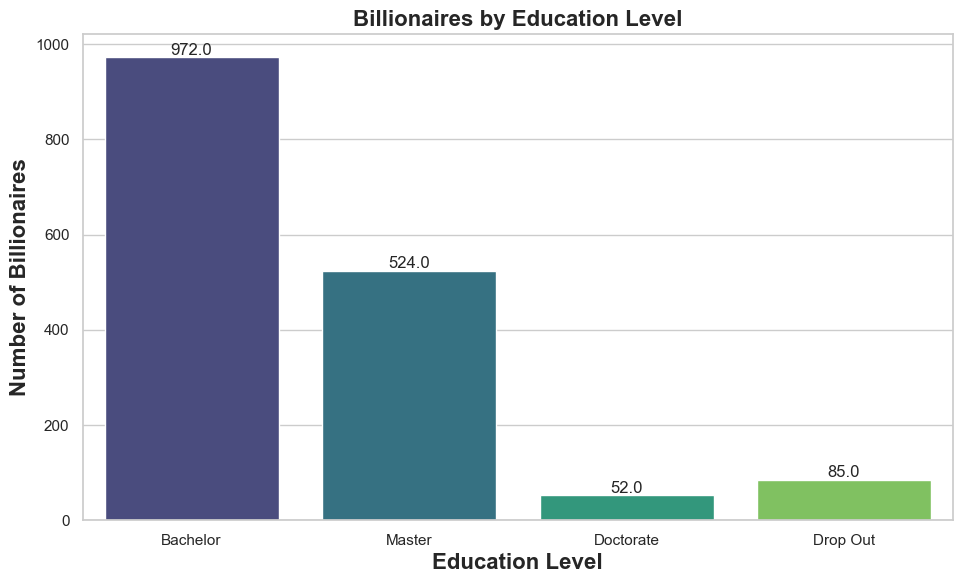

In [13]:
# Education

# Calculate the counts for each education level
education_counts = df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('Billionaires by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Pie Chart of Countries

In [161]:
country_pie = px.pie(top_10_billionaires, values='net_worth', names='country', title='Net Worth in relation to Countries')
country_pie.show()

# Pie Chart of Industries

In [162]:
industry_pie = px.pie(top_10_billionaires, values='net_worth', names='industry', title='Net Worth in relation to Industries')
industry_pie.show()

# Statistical Analysis

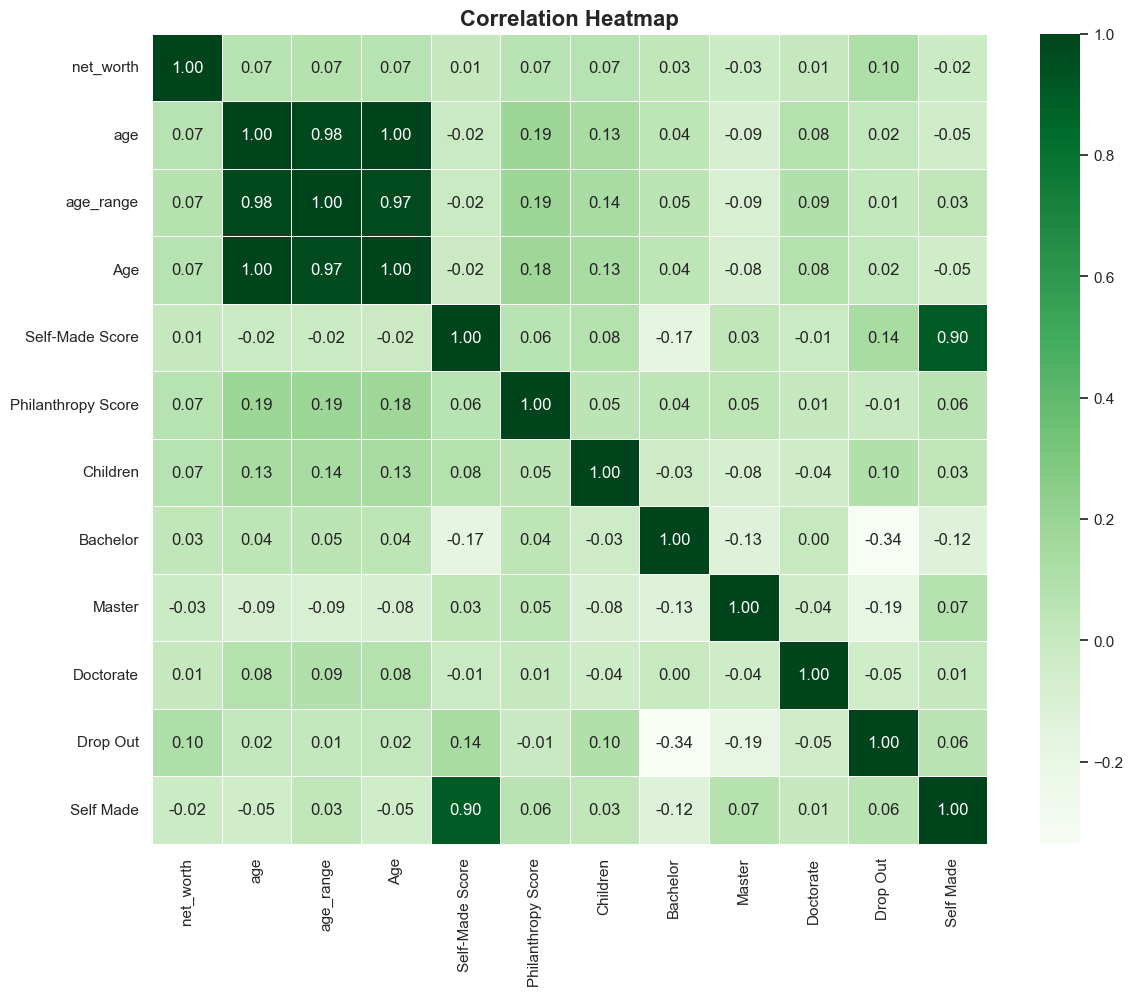

In [15]:
# create correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# create a heatmap
plt.figure(figsize= (12 ,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens', fmt = ".2f", linewidths = 0.5 )

#title
plt.title('Correlation Heatmap', fontsize = 16, fontweight = 'bold')

# display
plt.show()

### Feature Engineering

In [147]:
# First - Create a copy of df to use for the statistical analysis.
df_stats = df

In [148]:
# Second - Select categorical variables to convert to dummies and drop the rest

# Get a list of object-type columns
object_columns = df_stats.select_dtypes(include=['object']).columns.tolist()

# Print the list of object-type columns
print("Object-type columns:", object_columns)

# Print the count of unique entries in each object-type column
for column in object_columns:
    unique_count = df_stats[column].nunique()
    print(f"Column '{column}' has {unique_count} unique entries.")
    
# Create droplist
drop_list = ['name','forbes_id','Source of Wealth','Residence','Education','country','Citizenship','source']

# Drop droplist 
df_stats = df_stats.drop(drop_list, axis=1)

Object-type columns: ['name', 'forbes_id', 'country', 'source', 'industry', 'Source of Wealth', 'Residence', 'Citizenship', 'Marital Status', 'Education']
Column 'name' has 2638 unique entries.
Column 'forbes_id' has 2640 unique entries.
Column 'country' has 77 unique entries.
Column 'source' has 905 unique entries.
Column 'industry' has 18 unique entries.
Column 'Source of Wealth' has 1043 unique entries.
Column 'Residence' has 772 unique entries.
Column 'Citizenship' has 77 unique entries.
Column 'Marital Status' has 8 unique entries.
Column 'Education' has 1141 unique entries.


In [149]:
# Create dummy variables and append them to dataframe

# Create an empty list to store the dummy variables
dummy_list = []

# Loop through the DataFrame columns
for column in df_stats.columns:
    if df[column].dtype == 'object':
        # Create dummy variables and append them to the list
        dummies = pd.get_dummies(df[column], prefix=column)
        dummy_list.append(dummies)

# Concatenate the dummy variables into a new DataFrame
dummy_df = pd.concat(dummy_list, axis=1)

# Append the dummy variables to the main DataFrame
df_stats = pd.concat([df_stats, dummy_df], axis=1)


In [150]:
df_stats.head()

,net_worth,age,age_range,industry,Age,Self-Made Score,Philanthropy Score,Marital Status,Children,Bachelor,...,industry_Technology,industry_Telecom,Marital Status_Divorced,Marital Status_Engaged,Marital Status_In Relationship,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,"Marital Status_Widowed, Remarried"
rank,,,,,,,,,,,,,,,,,,,,,
1,211.0,74.0,8,Fashion & Retail,74.0,NaN,NaN,Married,5.0,1.0,...,False,False,False,False,False,True,False,False,False,False
2,180.0,51.0,6,Automotive,52.0,8.0,1.0,Single,10.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,114.0,59.0,6,Technology,59.0,8.0,2.0,Engaged,4.0,1.0,...,True,False,False,True,False,False,False,False,False,False
4,107.0,78.0,8,Technology,79.0,9.0,1.0,In Relationship,4.0,0.0,...,True,False,False,False,True,False,False,False,False,False
5,106.0,92.0,10,Finance & Investments,92.0,8.0,5.0,"Widowed, Remarried",3.0,1.0,...,False,False,False,False,False,False,False,False,False,True


In [151]:
# Get final list of object columns

final_object_columns = df_stats.select_dtypes(include=['object']).columns.tolist()

# Drop columns used to create dummies

df_stats = df_stats.drop(final_object_columns, axis=1)

# Drop NaN
df_stats = df_stats.dropna()

In [152]:
df_stats.head()

,net_worth,age,age_range,Age,Self-Made Score,Philanthropy Score,Children,Bachelor,Master,Doctorate,...,industry_Technology,industry_Telecom,Marital Status_Divorced,Marital Status_Engaged,Marital Status_In Relationship,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,"Marital Status_Widowed, Remarried"
rank,,,,,,,,,,,,,,,,,,,,,
2,180.0,51.0,6,52.0,8.0,1.0,10.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,114.0,59.0,6,59.0,8.0,2.0,4.0,1.0,0.0,0.0,...,True,False,False,True,False,False,False,False,False,False
4,107.0,78.0,8,79.0,9.0,1.0,4.0,0.0,0.0,0.0,...,True,False,False,False,True,False,False,False,False,False
5,106.0,92.0,10,92.0,8.0,5.0,3.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
6,104.0,67.0,7,67.0,8.0,5.0,3.0,0.0,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


In [121]:
X = df_stats.drop('net_worth', axis=1)
y = df_stats['net_worth']

In [122]:
print(df_stats.dtypes)

net_worth                              float64
age                                    float64
age_range                                int64
Age                                    float64
Self-Made Score                        float64
Philanthropy Score                     float64
Children                               float64
Bachelor                               float64
Master                                 float64
Doctorate                              float64
Drop Out                               float64
Self Made                                int64
industry_Automotive                       bool
industry_Construction & Engineering       bool
industry_Diversified                      bool
industry_Energy                           bool
industry_Fashion & Retail                 bool
industry_Finance & Investments            bool
industry_Food & Beverage                  bool
industry_Gambling & Casinos               bool
industry_Healthcare                       bool
industry_Logi

In [123]:
# Get final final list of object columns

final_final_object_columns = df_stats.select_dtypes(include=['object']).columns.tolist()
print(final_final_object_columns)

[]


In [124]:
# Add a constant (intercept) to the DataFrame
df_stats = sm.add_constant(df_stats)

# Create the multiple linear regression model
X = df_stats.drop('net_worth', axis = 1) #keep features only for X
y = df_stats['net_worth'] #keep target variable only for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [125]:
sc = StandardScaler()
# fit the data i.e. calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [126]:
X_reg = sm.add_constant(X_train_sc) # adding a constant
reg1 = sm.OLS(np.asarray(y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     7.341
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.15e-21
Time:                        23:15:10   Log-Likelihood:                -1009.4
No. Observations:                 254   AIC:                             2089.
Df Residuals:                     219   BIC:                             2213.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   9.5402      0.870     10.970      0.000       7.826      11.254
const                                4.276e-14   6.81e-14      0.628      0.531   -9.14e-14    1.77e-13
age                                   -14.9406     21.781     -0.686      0.493     -57.868      27.987
age_range                               1.6074      3.716      0.433      0.666      -5.717       8.932
Age                                    12.6941     21.715      0.585      0.559     -30.103      55.491
Self-Made Score                        -2.0252      2.277     -0.889      0.375      -6.514       2.463
Philanthropy Score                      0.4585      0.942      0.487      0.627      -1.398       2.315
Children                                3.0814      0.992      3.106      0.002       1.126       5.037
Bachelor                                1.6672      1.399      1.192      0.235      -1.090       4.425
Master                                  0.2938      0.968      0.304      0.762      -1.614       2.201
Doctorate                               0.2473      0.933      0.265      0.791      -1.591       2.086
Drop Out                                3.0357      1.307      2.323      0.021       0.460       5.612
Self Made                               2.2983      2.246      1.023      0.307      -2.128       6.724
industry_Automotive                     1.8228      0.926      1.969      0.050      -0.002       3.647
industry_Construction & Engineering     0.0318      0.898      0.035      0.972      -1.738       1.802
industry_Diversified                    3.4404      0.878      3.919      0.000       1.710       5.171
industry_Energy                        -0.3283      0.849     -0.387      0.699      -2.002       1.345
industry_Fashion & Retail               2.1149      0.858      2.465      0.014       0.424       3.806
industry_Finance & Investments         -0.5989      0.715     -0.838      0.403      -2.008       0.810
industry_Food & Beverage               -1.3350      0.861     -1.551      0.122      -3.032       0.362
industry_Gambling & Casinos             0.3886      0.873      0.445      0.657      -1.332       2.109
industry_Healthcare                    -1.2220      0.869     -1.407      0.161      -2.934       0.490
industry_Logistics                     -0.9403      0.920     -1.022      0.308      -2.754       0.873
industry_Manufacturing                 -0.5484      0.871     -0.630      0.530      -2.265       1.168
industry_Media & Entertainment         -1.0592      0.857     -1.236      0.218      -2.748       0.630
industry_Metals & Mining             1.324e-15   1.21e-15      1.095      0.275   -1.06e-15    3.71e-15
industry_Real Estate                   -0.6900      0.855     -0.80

In [127]:
coef_vec = pd.DataFrame(reg1.params.round(2))

coef_vec = coef_vec.reset_index()

coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})

coef

,Variable_Names,MultiReg_coeff
0,const,9.54
1,const,0.00
2,age,-14.94
3,age_range,1.61
4,Age,12.69
5,Self-Made Score,-2.03
6,Philanthropy Score,0.46
7,Children,3.08
8,Bachelor,1.67
9,Master,0.29


In [128]:
# Step 2 and 3: Iteratively remove features with p-values above 0.05
insig_features = [] # Store names of insignificant features
while True:
    # Get the feature with the highest p-value
    max_pvalue = reg1.pvalues[1:].max()
    if max_pvalue > 0.05:
        feature_to_remove = reg1.pvalues[1:].idxmax()
        insig_features.append(feature_to_remove)
        print(f"Removing feature: {feature_to_remove} (p-value={max_pvalue:.4f})")
        
        # Create a new OLS model without the feature to be removed
        X_reg = X_reg.drop(feature_to_remove, axis=1)
        X_reg = sm.add_constant(X_reg)
        reg1 = sm.OLS(np.asarray(y_train), X_reg).fit()
    else:
        break

Removing feature: industry_Construction & Engineering (p-value=0.9718)
Removing feature: industry_Finance & Investments (p-value=0.8723)
Removing feature: industry_Energy (p-value=0.9560)
Removing feature: industry_Sports (p-value=0.9074)
Removing feature: Doctorate (p-value=0.7854)
Removing feature: industry_Manufacturing (p-value=0.7738)
Removing feature: industry_Service (p-value=0.7753)
Removing feature: industry_Real Estate (p-value=0.7557)
Removing feature: Master (p-value=0.6841)
Removing feature: age_range (p-value=0.6766)
Removing feature: Marital Status_Divorced (p-value=0.6304)
Removing feature: const (p-value=0.7624)
Removing feature: industry_Telecom (p-value=0.6178)
Removing feature: Age (p-value=0.5937)
Removing feature: Philanthropy Score (p-value=0.5156)
Removing feature: industry_Gambling & Casinos (p-value=0.5343)
Removing feature: age (p-value=0.5129)
Removing feature: industry_Media & Entertainment (p-value=0.3958)
Removing feature: industry_Logistics (p-value=0.36

In [129]:
# Create a list of statistically significant variables to use for the final model
results = reg1.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred

array(['const', 'Children', 'industry_Automotive', 'industry_Diversified',
       'industry_Fashion & Retail', 'industry_Technology',
       'Marital Status_Engaged', 'Marital Status_In Relationship',
       'Marital Status_Separated', 'Marital Status_Single'], dtype=object)

array(['Children', 'industry_Automotive', 'industry_Diversified',
       'industry_Fashion & Retail', 'industry_Technology',
       'Marital Status_Engaged', 'Marital Status_In Relationship',
       'Marital Status_Separated', 'Marital Status_Single'], dtype=object)

In [130]:
X_train_new = X_train_sc[stat_sig_Pred]
X_train_new = sm.add_constant(X_train_new)

reg = sm.OLS(np.asarray(y_train), X_train_new).fit()

In [131]:
coef_vec = pd.DataFrame(reg.params.round(2))

coef_vec = coef_vec.reset_index()

coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})

coef

,Variable_Names,MultiReg_coeff
0,const,9.54
1,Children,2.65
2,industry_Automotive,2.21
3,industry_Diversified,3.78
4,industry_Fashion & Retail,2.44
5,industry_Technology,2.63
6,Marital Status_Engaged,6.29
7,Marital Status_In Relationship,5.85
8,Marital Status_Separated,2.75
9,Marital Status_Single,6.54
